Analysis of data obtained from BMP280 pressure sensor

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read data from file on GitHub

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/nvandegiesen/Barometry/master/BMP280.csv')
var1, var2 = df.keys()

'Temperature (°C)'

Give basic stats

In [5]:
df.describe()

,Temperature (°C),Pressure (Pa)
count,5510.000000,5510.000000
mean,22.565539,100801.135457
std,0.030601,5.863735
min,22.490000,100782.160000
25%,22.540000,100797.640000
50%,22.570000,100800.730000
75%,22.590000,100805.737500
max,22.630000,100816.970000


Plot T & P

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3a5fda0f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ff3a5ef6a58>], dtype=object)

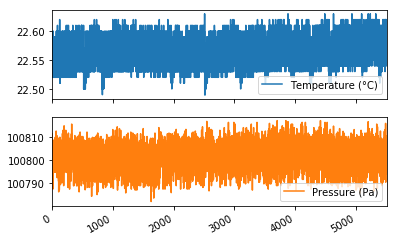

In [4]:
df.plot(subplots=True)

Show effect of averaging over many samples on std of sample mean. Compare this with that of white noise. 

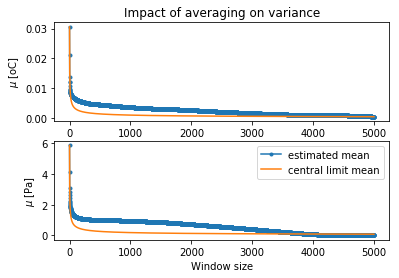

In [15]:
wins = np.arange(1, 5001)
std = [[df[var].rolling(window=win).mean().std() for win in wins] for var in [var1, var2]]
# .rename(columns=lambda x: x + 1)
# std = _.transpose().rename(lambda x: x + 1)

# also make an idealized white noise reduction with central limit assumption
white_noise_1 = [std[n][0:1]/np.sqrt(wins) for n in range(len(std))]

# glue together

ax = plt.subplot(211)
ax.plot(np.arange(len(std[0])), std[0], marker='.', label='estimated mean')
ax.plot(np.arange(len(std[0])), white_noise_1[0], label='central limit mean')
plt.xlabel('Window size')
plt.ylabel('$\mu$ [oC]')
plt.title('Impact of averaging on variance')
ax = plt.subplot(212)
ax.plot(np.arange(len(std[1])), std[1], marker='.', label='estimated mean')
ax.plot(np.arange(len(std[1])), white_noise_1[1], label='central limit mean')
plt.xlabel('Window size')
plt.ylabel('$\mu$ [Pa]')
plt.legend()